# Лабораторная работа №4

# 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

Информация о Наборе данных:
Набор данных содержит 9568 точек данных, собранных с электростанции комбинированного цикла за 6 лет (2006-2011), когда
электростанция была настроена на работу с полной нагрузкой. Характеристики состоят из среднечасовых переменных температуры окружающей среды (T),
давления окружающей среды (AP), относительной влажности (RH) и вакуума выхлопных газов (V) для прогнозирования чистой почасовой
выработки электроэнергии (EP) установки.

Электростанция с комбинированным циклом (ПГУ) состоит из газовых турбин (ГТ), паровых турбин (СТ) и
парогенераторов с рекуперацией тепла. В ПГУ электроэнергия вырабатывается газовыми и паровыми турбинами, которые объединены в одном
цикле, и передается от одной турбины к другой. В то время как вакуум отсоединяется от пара и воздействует на него
Турбина, остальные три переменные окружающей среды влияют на производительность GT.
Для сравнения с нашими базовыми исследованиями и для того, чтобы можно было проводить статистические тесты 5x2 раза, мы предоставляем данные
, перетасованные пять раз. Для каждой перетасовки выполняется 2-кратное CV, и полученные 10 измерений используются для
статистического тестирования.
Мы предоставляем данные как в форматах .ods, так и в форматах .xlsx.

Атрибутивная информация:
Функции состоят из среднечасовых переменных окружающей среды
- Температура (T) в диапазоне от 1,81°C до 37,11°C,
- Давление окружающей среды (AP) в диапазоне 992,89-1033,30 милибар,
- Относительная влажность (RH) в диапазоне от 25,56% до 100,16%
- Разрежение выхлопных газов (V) в диапазоне 25,36-81,56 см рт. ст.
- Чистая почасовая выработка электроэнергии (EP) 420,26-495,76 МВт

Средние значения берутся с различных датчиков, расположенных вокруг установки, которые ежесекундно регистрируют переменные окружающей среды. Переменные даны без нормализации.


In [3]:
import copy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import sklearn as sk
import copy as copy
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import train_test_split, GridSearchCV
from scipy.stats import pearsonr, spearmanr
from sklearn.metrics import mean_absolute_error
%matplotlib inline

In [4]:
data = pd.read_excel('Folds5x2_pp.xlsx')
data = data.rename(columns={'AT':'Температура', 'V':'Разряженность', 'AP':'Давление', 'RH':'Влажность', 'PE':'Выработка'})
data

,Температура,Разряженность,Давление,Влажность,Выработка
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
...,...,...,...,...,...
9563,16.65,49.69,1014.01,91.00,460.03
9564,13.19,39.18,1023.67,66.78,469.62
9565,31.32,74.33,1012.92,36.48,429.57
9566,24.48,69.45,1013.86,62.39,435.74


# 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после.

In [5]:
print('Original size: ', len(data))
original = len(data)
data.drop_duplicates(inplace = True)
data.dropna()
print('Final size: ', len(data))
final = len(data)
print('Difference:', original - final)

Original size:  9568
Final size:  9527
Difference: 41


# 3.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

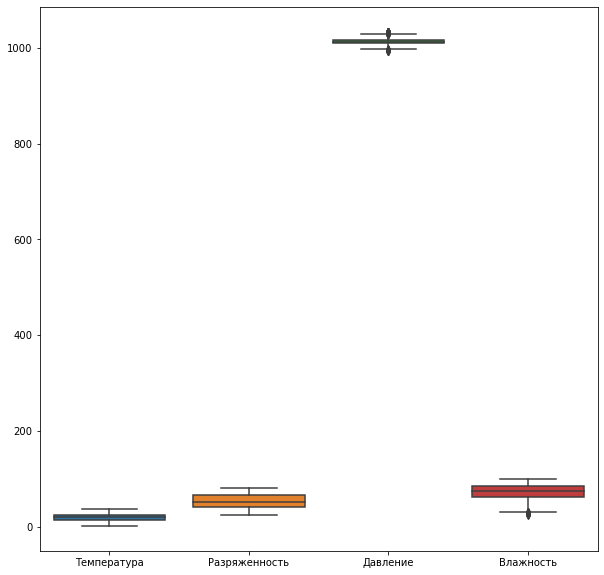

In [6]:
data_copy=data.drop(columns = ['Выработка'])
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_copy)
plt.show()

<AxesSubplot:>

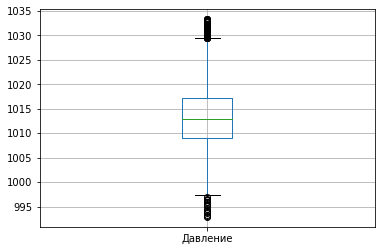

In [7]:
data.boxplot(column = ['Давление'])

In [8]:
from sklearn import preprocessing
data_normal = preprocessing.normalize(data_copy, axis=0, norm = 'max')
data_normal = pd.DataFrame(data_normal)
data_normal.columns = ['Температура', 'Разряженность', 'Давление', 'Влажность']
data_normal

,Температура,Разряженность,Давление,Влажность
0,0.403126,0.512016,0.991067,0.730531
1,0.678523,0.771947,0.987167,0.589856
2,0.137699,0.483080,0.979541,0.919928
3,0.562113,0.702795,0.977683,0.765176
4,0.291566,0.459784,0.976706,0.964657
...,...,...,...,...
9522,0.448666,0.609245,0.981332,0.908546
9523,0.355430,0.480383,0.990680,0.666733
9524,0.843977,0.911354,0.980277,0.364217
9525,0.659660,0.851520,0.981186,0.622903


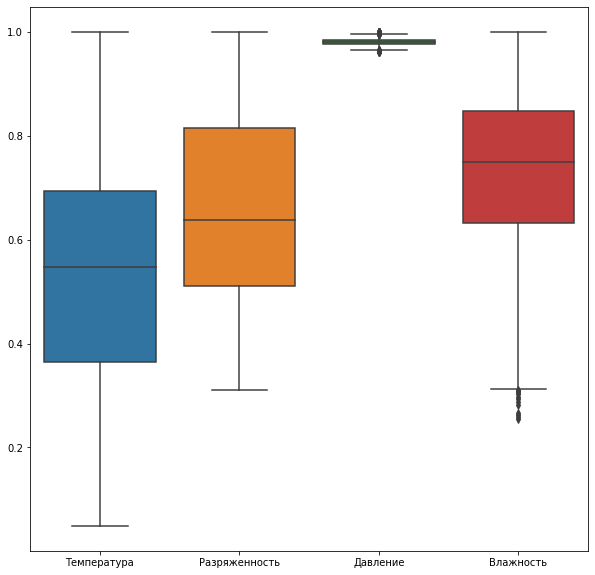

In [9]:
plt.figure(figsize=(10, 10))
sns.boxplot(data=data_normal)
plt.show()

<AxesSubplot:>

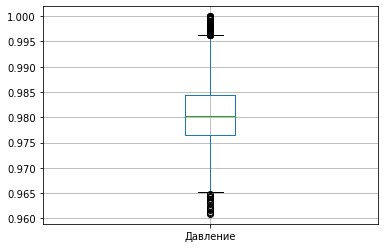

In [10]:
data_normal.boxplot(column = ['Давление'])

# 4.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены.

# 5.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других.

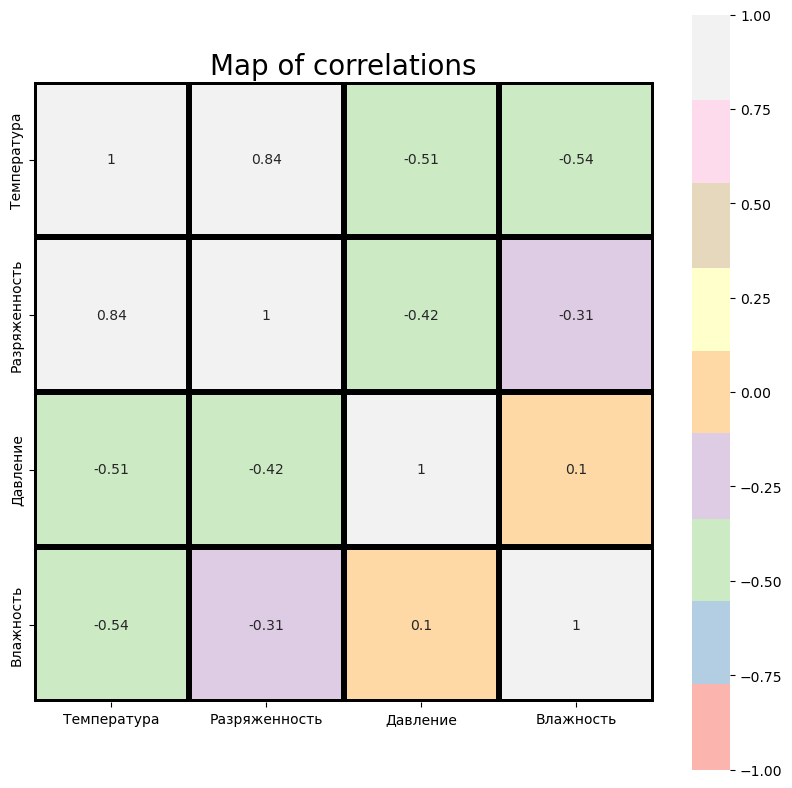

,Температура,Разряженность,Давление,Влажность
Температура,1.000000,0.843689,-0.508222,-0.543947
Разряженность,0.843689,1.000000,-0.415718,-0.312214
Давление,-0.508222,-0.415718,1.000000,0.101631
Влажность,-0.543947,-0.312214,0.101631,1.000000


In [11]:
import matplotlib
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10), dpi= 100)
sns.heatmap(data_normal.corr(), xticklabels=data_normal.corr().columns, yticklabels=data_normal.corr().columns, annot = True, vmin=-1, vmax=1, center= 0, linewidths=3, linecolor='black', square=True, cmap='Pastel1')
plt.title('Map of correlations', fontsize=20)
plt.show()

data_normal.corr()

# 6. Заполните пропущенные значения в данных;

In [12]:
data_normal.isnull().sum()

Температура      0
Разряженность    0
Давление         0
Влажность        0
dtype: int64

# 7.	Решите поставленную задачу регрессии в соответствии с заданием. При подборе параметров метода принятия решения (метода регрессии) используйте перекрёстную проверку (изучите возможные для изменения параметры метода регрессии).  Вычислите точность решения задачи, вычислив разницу между реальным значением и предсказанным. Вычислите коэффициент корреляции (Пирсона, Спирмена) между реальным значением и предсказанным с учётом p-value. 

In [13]:
x, y = data_normal, data['Выработка']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [14]:
LR = LinearRegression()
LR.fit(x_train, y_train)
predict_LR = LR.predict(x_test)

person_PR, pvalue_pearson_PR = pearsonr(predict_LR, y_test)
spermen_PR, pvalue_spermen_PR = spearmanr(predict_LR, y_test)
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)
print('Cредняя абсолютная ошибка = %8.5f' %mean_absolute_error(predict_LR, y_test))

Пирсон:  0.9623078660878572
pvalue:  0.0
Спирмен:  0.962218497860409
pvalue:  0.0
Cредняя абсолютная ошибка =  3.64828


In [15]:
#RIDGE регуляризатор
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, r2_score

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_train_pred = ridge.predict(x_train)
y_test_pred = ridge.predict(x_test)
print(ridge.coef_)
print('Среднеквадратичная ошибка: {:.3f}, test: {:.3f}'.format(mean_squared_error(y_train, y_train_pred), mean_squared_error(y_test, y_test_pred)))
print('Коэффициент детерминации: {:.3f}, test: {:.3f}'.format(r2_score(y_train, y_train_pred), r2_score(y_test, y_test_pred)))

[-74.13595268 -19.24050749  35.41671907 -16.34598435]
Среднеквадратичная ошибка: 20.663, test: 21.119
Коэффициент детерминации: 0.929, test: 0.926


In [16]:
person_PR, pvalue_pearson_PR = pearsonr(y_test_pred, y_test)
spermen_PR, pvalue_spermen_PR = spearmanr(y_test_pred, y_test)
print('Пирсон: ', person_PR)
print('pvalue: ', pvalue_pearson_PR)
print('Спирмен: ', spermen_PR)
print('pvalue: ', pvalue_spermen_PR)

Пирсон:  0.9622575351458609
pvalue:  0.0
Спирмен:  0.962083838106989
pvalue:  0.0


In [17]:
RigeModel = Ridge(alpha=0.1)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.925788218432237

In [18]:
RigeModel = Ridge(alpha=0.01)
RigeModel.fit(x_train, y_train)
RigeModel.score(x_test, y_test)

0.925865507259782

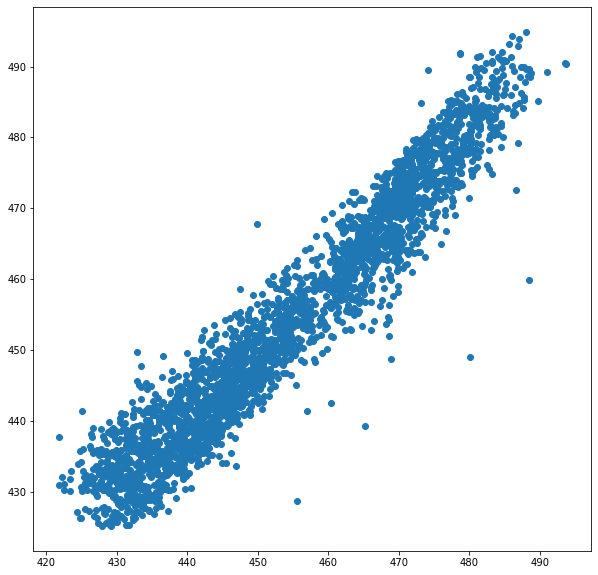

In [21]:
plt.figure(figsize=(10,10))
plt.scatter(RigeModel.predict(x_test), y_test)

## 